In [1]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from lstm import lstm_model, train_lstm
from data_processing import get_and_save_data, get_train_test_data, convert_to_1d
from globals import DATA

In [2]:
# If you do not have data saved locally, run this
get_and_save_data(dir_path=DATA)

In [3]:
train_data, encoder_input_train, decoder_output_train, test_data, encoder_input_test, decoder_output_test = get_train_test_data(dir_path=DATA, batch_size=32)

In [4]:
input_dim, hidden_dim, layer_dim, output_dim = 2, 64, 3, 1

model_untrained = lstm_model(input_dim, hidden_dim, layer_dim, output_dim)   #not trained, for comparison
model_trained = lstm_model(input_dim, hidden_dim, layer_dim, output_dim)

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_trained.to(device)
model_untrained.to(device)

lstm_model(
  (lstm): LSTM(2, 64, num_layers=3, batch_first=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)

In [7]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
loss_curve = train_lstm(model_trained, device, train_loader, num_epochs=10, lr=0.001)

Epoch: 1/10, Step: 100/1575, Loss: 0.0336
Epoch: 1/10, Step: 200/1575, Loss: 0.0339
Epoch: 1/10, Step: 300/1575, Loss: 0.0225
Epoch: 1/10, Step: 400/1575, Loss: 0.0269
Epoch: 1/10, Step: 500/1575, Loss: 0.0277
Epoch: 1/10, Step: 600/1575, Loss: 0.0238
Epoch: 1/10, Step: 700/1575, Loss: 0.0205
Epoch: 1/10, Step: 800/1575, Loss: 0.0239
Epoch: 1/10, Step: 900/1575, Loss: 0.0214
Epoch: 1/10, Step: 1000/1575, Loss: 0.0229
Epoch: 1/10, Step: 1100/1575, Loss: 0.0209
Epoch: 1/10, Step: 1200/1575, Loss: 0.0223
Epoch: 1/10, Step: 1300/1575, Loss: 0.0208
Epoch: 1/10, Step: 1400/1575, Loss: 0.0169
Epoch: 1/10, Step: 1500/1575, Loss: 0.0172
Epoch: 2/10, Step: 100/1575, Loss: 0.0220
Epoch: 2/10, Step: 200/1575, Loss: 0.0158
Epoch: 2/10, Step: 300/1575, Loss: 0.0146
Epoch: 2/10, Step: 400/1575, Loss: 0.0141
Epoch: 2/10, Step: 500/1575, Loss: 0.0156
Epoch: 2/10, Step: 600/1575, Loss: 0.0125
Epoch: 2/10, Step: 700/1575, Loss: 0.0137
Epoch: 2/10, Step: 800/1575, Loss: 0.0136
Epoch: 2/10, Step: 900/1575,

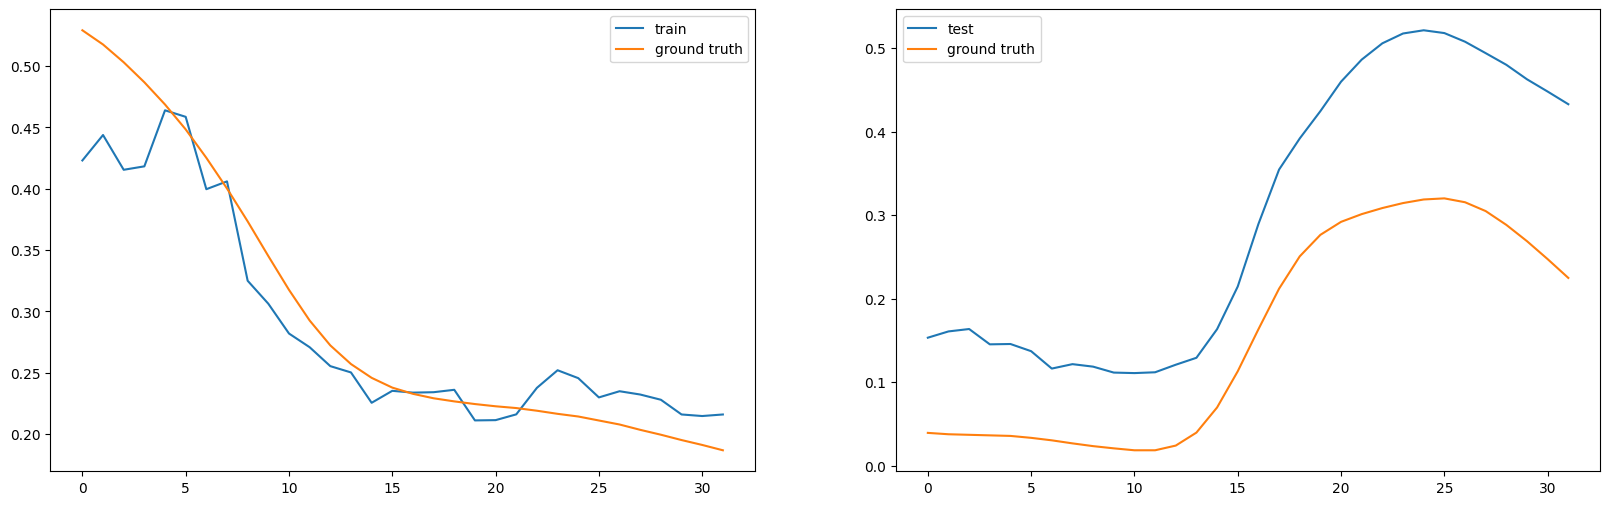

In [15]:
output_trainset = model_trained(torch.from_numpy(encoder_input_train[0:1280]).to(device).float())
output_testset = model_trained(torch.from_numpy(encoder_input_test[0:1280]).to(device).float())

#subplot for two
#make the plot larger
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(output_trainset.cpu().detach().numpy()[50,:,0], label='train')
plt.plot(decoder_output_train[50,:,0], label='ground truth')
plt.legend()

plt.subplot(1,2,2)
plt.plot(output_testset.cpu().detach().numpy()[50,:,0], label='test')
plt.plot(decoder_output_test[50,:,0], label='ground truth')
plt.legend()

In [25]:
output_testset_1d = convert_to_1d(output_testset.cpu().detach().numpy())
decoder_output_test_1d = convert_to_1d(decoder_output_test)
output_trainset_1d = convert_to_1d(output_trainset.cpu().detach().numpy())
decoder_output_train_1d = convert_to_1d(decoder_output_train)

In [20]:
output_testset_1d.shape

(1311,)

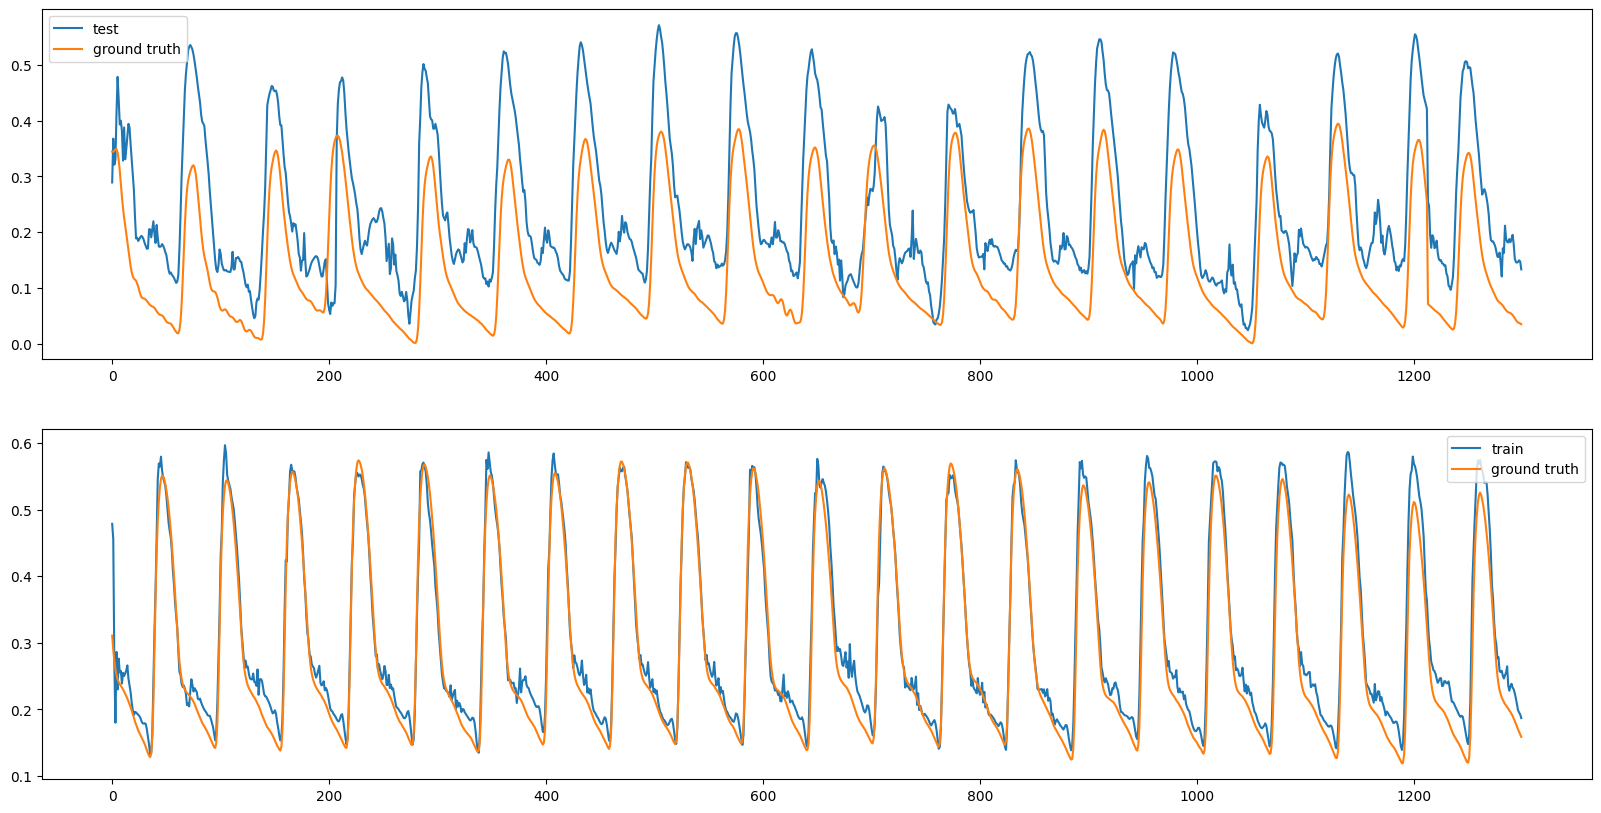

In [26]:
#comapre the output_testset_1d with the ground truth
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(output_testset_1d[:1300], label='test')
plt.plot(decoder_output_test_1d[:1300], label='ground truth')
plt.legend()

plt.subplot(2,1,2)
#train output
plt.plot(output_trainset_1d[:1300], label='train')
plt.plot(decoder_output_train_1d[:1300], label='ground truth')
plt.legend()
